### Tools & libraries : 
- Python, Jupyter, pandas, scikit-learn, numpy, timeit

### DATASETS : 
- [Cars Data](https://www.kaggle.com/abineshkumark/carsdata) (classification).


## 1. INTRODUCTION

- **Ensemble methods** aim to improve **generalizability** and **robustness** of an algorithm (single estimator) by combining the predictions of several base estimators [1,2]. 
- **The estimators** are built with a given Machine Learning algorithm.s, e.g: Decision Tree like CART and ID3, etc.
- To acheive this there are two general methods
  - (1) Averaging : 
      - Principle : Build several estimators independently and then to **Average** their predictions. 
      - Usually, The combined estimator is better than any of the single base estimator because its variance is reduced.
      - e.g., Bagging methods, Forests of randomized trees, etc.
  - (2) Boosting :
      - Principle : Weak Estimators are built sequentially, with each estimator attempting to reduce the bias of the predecessor (the combined estimator).
      - The weak learners often only have a slight performance advantage over random guessing.
      - The motivation is to combine several weak models to produce a powerful ensemble.
      - By focusing on training samples that are hard to classify, the overall performance of the ensemble is improved.
      - Boosting can lead to a decrease in bias and variance, but algorithms such as AdaBoost are also known for overfitting to the training data (high variance)
      - e.g., AdaBoost, Gradient Tree Boosting, etc.
      
 ==============================================================================================================================

## 2- Decision tree 

Here, we use decision trees to point out one of the problems that can arise in this type of learning. 


### 2-1- Data preprocessing

We use the [Cars Data] dataset (https://www.kaggle.com/abineshkumark/carsdata) in a classification task.


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt #matplotlib inline

In [2]:
# Reading the dataset
cars_data = pd.read_csv('carsdata.csv', skipinitialspace=True)
cars_data.info()
cars_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  259 non-null    float64
 3   hp           261 non-null    int64  
 4   weightlbs    258 non-null    float64
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 16.4+ KB


,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350.0,165,4209.0,12,1972,US.
1,31.9,4,89.0,71,1925.0,14,1980,Europe.
2,17.0,8,302.0,140,3449.0,11,1971,US.
3,15.0,8,400.0,150,3761.0,10,1971,US.
4,30.5,4,98.0,63,2051.0,17,1978,US.
...,...,...,...,...,...,...,...,...
256,17.0,8,305.0,130,3840.0,15,1980,US.
257,36.1,4,91.0,60,1800.0,16,1979,Japan.
258,22.0,6,232.0,112,2835.0,15,1983,US.
259,18.0,6,232.0,100,3288.0,16,1972,US.


**Analyze patterns within this dataset**

- 8 features: mpg, cylinders, cubicinches, hp, weightlbs, time-to-60, year, brand
- 261 instances
- Data is not balanced because it has empty value such as weightlbs just has 258 non-null value and cubicinches has 259 non-null 


In [3]:
# Let's do a bit of pre-processing
cars_data["cubicinches"] = pd.to_numeric(cars_data["cubicinches"])
cars_data.dropna(inplace=True)

# Let's have a look to the first ten rows
cars_data.head(10)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350.0,165,4209.0,12,1972,US.
1,31.9,4,89.0,71,1925.0,14,1980,Europe.
2,17.0,8,302.0,140,3449.0,11,1971,US.
3,15.0,8,400.0,150,3761.0,10,1971,US.
4,30.5,4,98.0,63,2051.0,17,1978,US.
5,23.0,8,350.0,125,3900.0,17,1980,US.
6,13.0,8,351.0,158,4363.0,13,1974,US.
7,14.0,8,440.0,215,4312.0,9,1971,US.
8,25.4,5,183.0,77,3530.0,20,1980,Europe.
9,37.7,4,89.0,62,2050.0,17,1982,Japan.


In [4]:
# Slit into X and Y
X = cars_data.values[:, :-1]
Y = cars_data.values[:,-1]

# Let's see the 10 first values of each table
X[:10], Y[:10]

(array([[14.0, 8, 350.0, 165, 4209.0, 12, 1972],
        [31.9, 4, 89.0, 71, 1925.0, 14, 1980],
        [17.0, 8, 302.0, 140, 3449.0, 11, 1971],
        [15.0, 8, 400.0, 150, 3761.0, 10, 1971],
        [30.5, 4, 98.0, 63, 2051.0, 17, 1978],
        [23.0, 8, 350.0, 125, 3900.0, 17, 1980],
        [13.0, 8, 351.0, 158, 4363.0, 13, 1974],
        [14.0, 8, 440.0, 215, 4312.0, 9, 1971],
        [25.4, 5, 183.0, 77, 3530.0, 20, 1980],
        [37.7, 4, 89.0, 62, 2050.0, 17, 1982]], dtype=object),
 array(['US.', 'Europe.', 'US.', 'US.', 'US.', 'US.', 'US.', 'US.',
        'Europe.', 'Japan.'], dtype=object))

**What do X and Y contain here?**

- X contain the Atribution with the value of columns: mpg, cylinders, cubicinches, hp, weightlbs, time-to-60, year
- Y contain the label with the column brand 

### 2-2- Training and testing

We train a decision tree model using [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) of scikit-learn

In [5]:
from sklearn import tree

**Build a first decision tree on the entire data given here.**


In [6]:
# Write your code here as answer 3
clf = tree.DecisionTreeClassifier()

clf.fit(X,Y)

DecisionTreeClassifier()

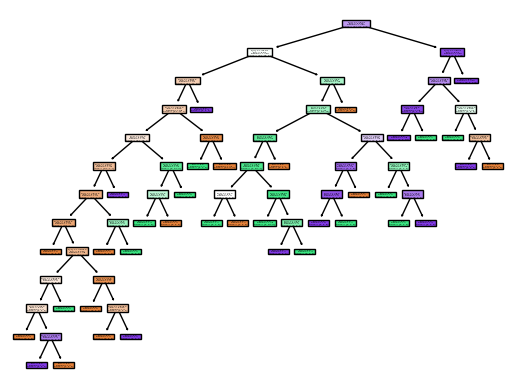

In [7]:
cars_tree=tree.plot_tree(clf,filled=True)
plt.show()

What are its characteristics (depth, performance...)?**

- Depth: 14
- Performance

**Now, divide your dataset into a training and a test sets, the training one containing 85% of the total number of instances. Build different trees, making the maximal depth change, starting from 3 until 20, and draw a curve to see the performance evolution, measured on the test set.**

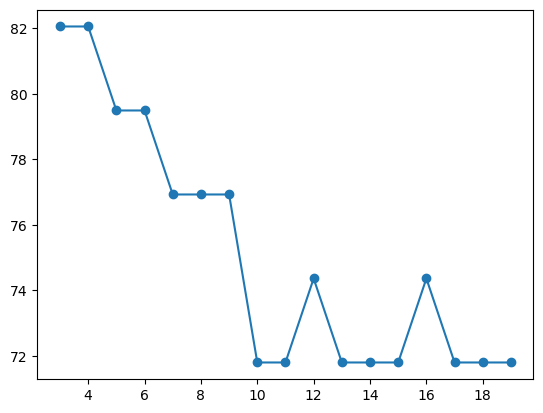

In [8]:
# Write your code here as answer 5
from sklearn.model_selection import train_test_split
# Initial division of the dataset
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,train_size=0.85)

success = []
for k in range(3,20):
    clf = tree.DecisionTreeClassifier(max_depth=k)
    success.append(100*(clf.fit(xtrain,ytrain).score(xtest,ytest)))
plt.plot(range(3,20), success, 'o-')
plt.show()

**What can we observe and deduce from the previous results?**

when the maximal depth change, the score is increasing but still descreasing something and it reamain at the some value.

**[Q7] Do the same thing, using a 6-fold cross-validation.**

[0.76744186 0.69767442 0.62790698 0.72093023 0.73809524 0.61904762]
[0.72093023 0.72093023 0.72093023 0.74418605 0.78571429 0.80952381]
[0.72093023 0.79069767 0.72093023 0.76744186 0.78571429 0.85714286]
[0.72093023 0.8372093  0.76744186 0.76744186 0.76190476 0.88095238]
[0.74418605 0.8372093  0.72093023 0.76744186 0.76190476 0.88095238]
[0.74418605 0.86046512 0.74418605 0.76744186 0.78571429 0.85714286]
[0.76744186 0.86046512 0.79069767 0.76744186 0.76190476 0.85714286]
[0.72093023 0.86046512 0.79069767 0.74418605 0.78571429 0.88095238]
[0.74418605 0.8372093  0.79069767 0.74418605 0.73809524 0.88095238]
[0.76744186 0.86046512 0.79069767 0.74418605 0.78571429 0.88095238]
[0.72093023 0.8372093  0.79069767 0.76744186 0.80952381 0.85714286]
[0.74418605 0.86046512 0.79069767 0.72093023 0.80952381 0.85714286]
[0.72093023 0.8372093  0.79069767 0.74418605 0.78571429 0.9047619 ]
[0.72093023 0.86046512 0.79069767 0.74418605 0.78571429 0.83333333]
[0.72093023 0.86046512 0.79069767 0.72093023 0.7

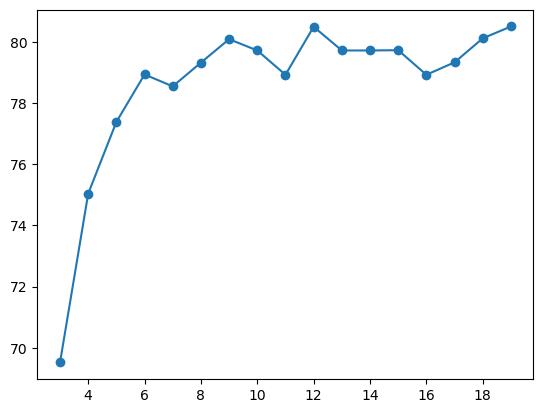

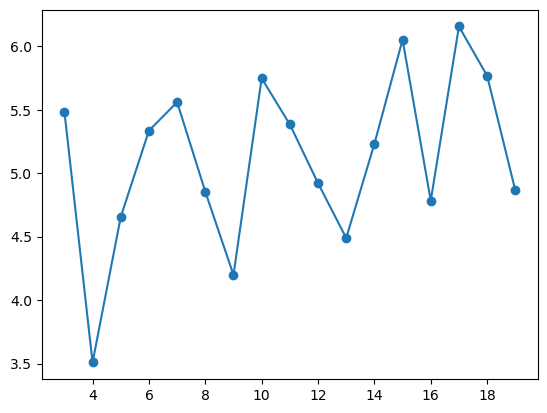

In [9]:
# Write your code here as answer 7
from sklearn.model_selection import cross_val_score
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,train_size=0.85)

success = []
std = []

for k in range(3,20):
    clf = tree.DecisionTreeClassifier(max_depth=k)
    scores = cross_val_score(clf,X,Y,cv=6)
    success.append(100*scores.mean())
    std.append(100*scores.std())
    print(scores)

plt.plot(range(3,20), success, 'o-')
plt.show()

plt.plot(range(3,20), std, 'o-')
plt.show()


when the maximal depth change, the score is fluctuate, it doesn't remain the value as same as the result before. Because cross validation help to reduce the overfitting. 

**[Q9] Running the previous code different times, what can you say about the behaviour of the algorithm? Do you see any problem with it?**

**Your Answer (A9) :**
when I change different times, the plots are different. THe algorithm'output is not stable. The problem is that it is not easy to know the actually score

## 3- Random Forests

The following are the basic steps involved in running the random forest algorithm:

- Choose N random data samples from the dataset.
- Build a decision tree based on these N samples.
- Choose the desired number of trees in your algorithm and repeat steps 1 and 2.
- The result:
   - In case of classification, each tree in the forest predicts the category to which the new record belongs. Finally, the new record is assigned to the category that wins the majority vote.

### 3-1- Data preprocessing

We use the same dataset as before 

### 3-2- Training and testing

We train two models of decision trees with [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) of scikit-learn: 
- **cart_2**: the default settings of scikit-learn (Gini and 2 min samples in a leaf)
- **cart7_2**: default Gini, and we set the max depth to 7

Also, we use [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to train a random forest model: 
- *forest*: default Gini, 100 trees in the random forest model

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB # pour les valeurs numériques
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import timeit
from sklearn.metrics import accuracy_score

NBR_RUN_2 = 7

train_times_2 = { "cart_2" : [], "cart7_2": [], "forest": [] }
conv_2 = {"cart_2" : [], "cart7_2": [], "forest": []}


test_times_2 = { "cart_2" : [], "cart7_2": [], "forest": [] }
perf_2 = { "cart_2": [], "cart7_2": [], "forest": [] }

# this function uses the global variables above
def evaluate(model_name, model, X_train, Y_train, X_test, Y_test):
    # Training time
    start_time = timeit.default_timer()
    model.fit(X_train, Y_train)
    train_times_2[model_name].append(timeit.default_timer() - start_time)
    # convergence
    Y_model_train = model.predict(X_train)
    conv_2[model_name].append(accuracy_score(Y_train, Y_model_train))
    # Test timing
    start_time = timeit.default_timer()
    Y_model_test = model.predict(X_test)
    test_times_2[model_name].append(timeit.default_timer() - start_time)
    # performance evaluation
    perf_2[model_name].append(accuracy_score(Y_test, Y_model_test))
    

for run in range(NBR_RUN_2): 
    # Data Preprocessing
    # Data Train-Test Spkit : 70%-30%
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=12) 
    
    # CART
    cart_2 = DecisionTreeClassifier() 
    evaluate("cart_2", cart_2, X_train, Y_train, X_test, Y_test)
    # CART 7
    cart7_2 = DecisionTreeClassifier(max_depth=7) 
    evaluate("cart7_2", cart7_2, X_train, Y_train, X_test, Y_test)
    
    # Classifier : Random forest with 100 Decision Trees
    forest = RandomForestClassifier(n_estimators=100, random_state=0) 
    evaluate("forest", forest, X_train, Y_train, X_test, Y_test)
    
print("END OF EVALUATION")

END OF EVALUATION


### 3-3- Analysis of the evaluation on testset

 **Analyze the following results**:
- Test time 
- Performance on test data
- We want to know if the forests have solved the problem of decision trees.

Here, we have drawn the metrics against the runs. 
The order of the runs is not important.
The most important thing is that one model must be stable compared to another on the different runs

In [11]:
# Inference (prediction) times
pd.DataFrame(test_times_2)

,cart_2,cart7_2,forest
0,0.000054,0.000059,0.002438
1,0.000049,0.000046,0.002504
2,0.000053,0.000047,0.002246
3,0.000043,0.000040,0.002287
4,0.000044,0.000042,0.002267
5,0.000044,0.000041,0.002296
6,0.000044,0.000042,0.002265


### Performances

In [12]:
# Performances saved values
pd.DataFrame(perf_2)

,cart_2,cart7_2,forest
0,0.805195,0.727273,0.818182
1,0.753247,0.766234,0.818182
2,0.766234,0.753247,0.818182
3,0.857143,0.779221,0.818182
4,0.844156,0.766234,0.818182
5,0.701299,0.766234,0.818182
6,0.766234,0.779221,0.818182


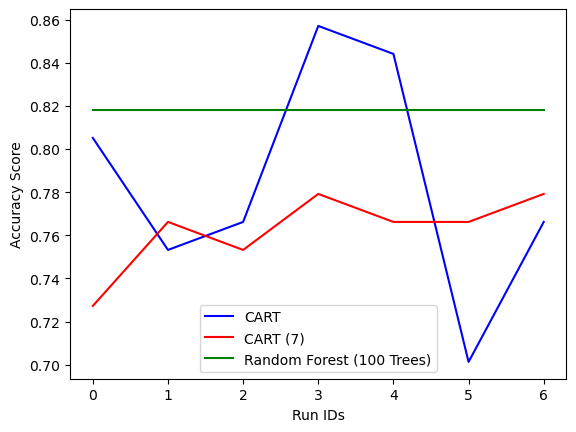

In [13]:
plt.plot(range(NBR_RUN_2), perf_2["cart_2"], color="blue", label="CART")
plt.plot(range(NBR_RUN_2), perf_2["cart7_2"], color="red", label="CART (7)")
plt.plot(range(NBR_RUN_2), perf_2["forest"], color="green", label="Random Forest (100 Trees)")
plt.ylabel("Accuracy Score")
plt.xlabel("Run IDs")
plt.legend()
plt.show()


- Test time: Random forest classifer take the most test time compare with 2 Decission tree classifer and the Decission tre classifer with no set maxdepth take the least test time
- Performance on test data:
    Cart_2: the perfomance value change in different time ;
    Cart7_2: the perfomance value still change in different time but it doesn't change for a while of time;
    Random forest: the perfomance value doesn't change in different time
    Sometime the score of decision tree with no set number of maxdepth is higher than the random forest
- The Random Forest solve the problem of decision tree, because when I run the algrorithm many times, the plot of random forest
doesn't change

    

### 3-4- Analysis of the effect of the number of decision trees in a random forest Model

Here, the number of decision trees in the forest is varied from 10 to 100 with a step of 5. 

**Analyze the results below** :
- Training time vs. number of trees
- Convergence vs. number of trees
- Prediction time vs. number of trees
- Performance vs. number of trees

In [14]:
# HERE, we will not apply several RUNs
nb_trees = range(10, 101, 5)

forest_nbr_temps_train = []       # An array that stores the training times of Random forests model relatively to the number of their trees
forest_nbr_conv = []              # An array that stores the convergence scores of the random forests model relatively to the number of their trees

forest_nbr_temps_test = []        # the prediction time of random forests relatively to the number of their trees
forest_nbr_perf = []              # the performance of random forests models relatively to the number of their trees

# Data Train-test split : 70%-30%
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=12) 

for nbr_trees in nb_trees: 
    # create a random forest model with diffrent number of trees "nb_trees"
    forest_nbr = RandomForestClassifier(n_estimators=nbr_trees, random_state=0) 
    
    # Training time
    start_time = timeit.default_timer()
    forest_nbr.fit(X_train, Y_train)
    forest_nbr_temps_train.append(timeit.default_timer() - start_time)
    
    # convergance (on training set)
    Y_forest_nbr_train = forest_nbr.predict(X_train)
    forest_nbr_conv.append(accuracy_score(Y_train, Y_forest_nbr_train))
    
    # Evalkuation time
    start_time = timeit.default_timer()
    forest_nbr_test = forest_nbr.predict(X_test)
    forest_nbr_temps_test.append(timeit.default_timer() - start_time)
    
    # Evaluation of performance
    forest_nbr_perf.append(accuracy_score(Y_test, forest_nbr_test))
    
print("END OF EVALUATION")

END OF EVALUATION


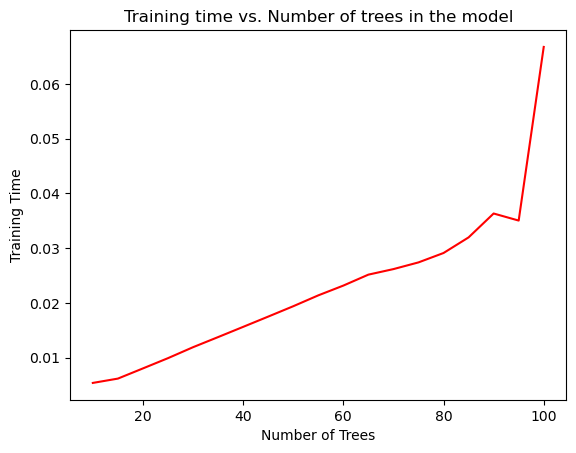

In [15]:
plt.plot(nb_trees, forest_nbr_temps_train, color="red")
plt.ylabel("Training Time")
plt.xlabel("Number of Trees")
plt.title("Training time vs. Number of trees in the model")
plt.show()

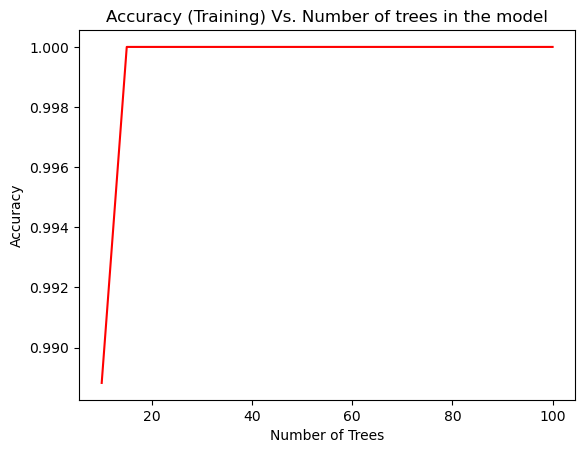

In [16]:
plt.plot(nb_trees, forest_nbr_conv, color="red")
plt.ylabel("Accuracy")
plt.xlabel("Number of Trees")
plt.title("Accuracy (Training) Vs. Number of trees in the model")
plt.show()

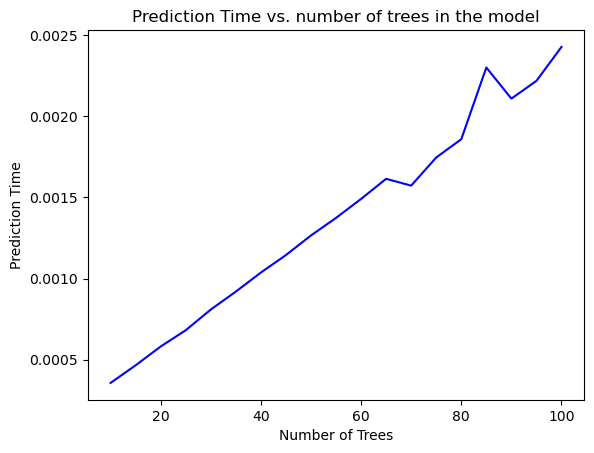

In [17]:
plt.plot(nb_trees, forest_nbr_temps_test, color="blue")
plt.ylabel("Prediction Time")
plt.xlabel("Number of Trees")
plt.title("Prediction Time vs. number of trees in the model")
plt.show()

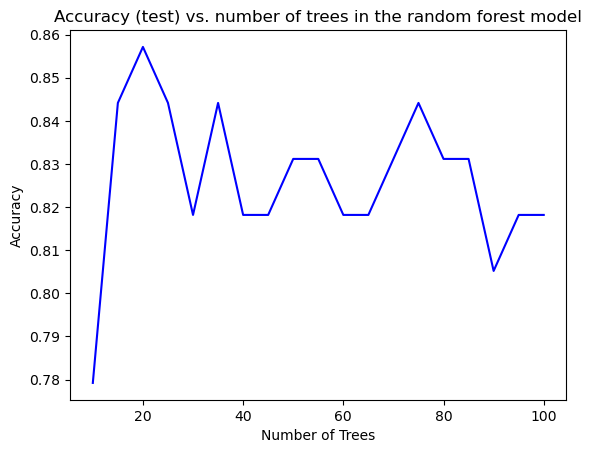

In [18]:
plt.plot(nb_trees, forest_nbr_perf, color="blue")
plt.ylabel("Accuracy")
plt.xlabel("Number of Trees")
plt.title("Accuracy (test) vs. number of trees in the random forest model")
plt.show()


- Training time vs. number of trees: training time increasing when number of trees is increasing. When run the algorithm again the training time is different (the plot change)
- Convergence vs. number of trees: when number of trees is increasing the convergence is increasing to limit 1. When run the algorithm again the convergence is stable
- Prediction time vs. number of trees: prediction time increasing but fluctation sometimes when number of trees is increasing. When run the algorithm again the prediction time is different (the plot change)
- Performance vs. number of trees: Performance is not stable, go up and down when number of trees is increasing. When run the algorithm again the performance is remain. 


### 3-5- Analysis of the effect of the maximum depth of trees in a forest

Here, the depth of trees in the forest is varied from 1 to 10 with a step of 1. 

**Analyze the following results**:
- Training time vs. number of trees
- Convergence vs. number of trees [on training data]
- Prediction time vs. number of trees
- Performance vs. number of trees [on unssen data, the test set]

In [19]:
# HERE, we will not apply several RUNs
depths_trees = range(1, 11)

forest_depth_time_train = []      
forest_depth_conv = []            
forest_depth_time_test = []       
forest_depth_perf = []             

# Data train-test split 70%-30%
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=12) 

for depth_trees in depths_trees: 
    # create a random forest model with diffrent number of Max-Depth
    forest_depth = RandomForestClassifier(n_estimators=40, random_state=0, max_depth=depth_trees)
    
    # Training time
    start_time = timeit.default_timer()
    forest_depth.fit(X_train, Y_train)
    forest_depth_time_train.append(timeit.default_timer() - start_time)
    
    # convergance (on training set)
    Y_forest_depth_train = forest_depth.predict(X_train)
    forest_depth_conv.append(accuracy_score(Y_train, Y_forest_depth_train))
    
    # Evaluation timing
    start_time = timeit.default_timer()
    forest_depth_test = forest_depth.predict(X_test)
    forest_depth_time_test.append(timeit.default_timer() - start_time)
    
    # Evaluation of performance
    forest_depth_perf.append(accuracy_score(Y_test, forest_depth_test))

print("FIN EVALUATION")

FIN EVALUATION


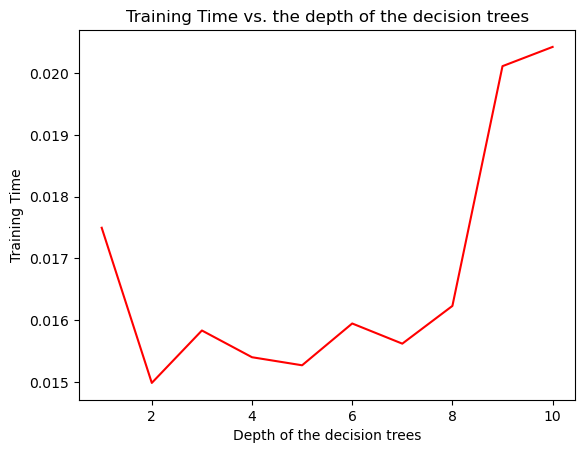

In [20]:
plt.plot(depths_trees, forest_depth_time_train, color="red")
plt.ylabel("Training Time")
plt.xlabel("Depth of the decision trees")
plt.title("Training Time vs. the depth of the decision trees")
plt.show()

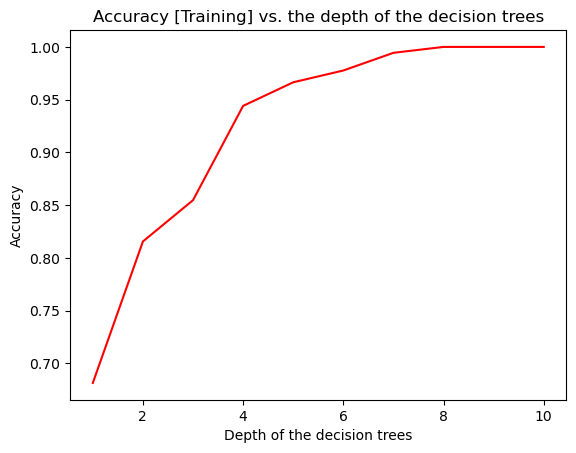

In [21]:
plt.plot(depths_trees, forest_depth_conv, color="red")
plt.ylabel("Accuracy")
plt.xlabel("Depth of the decision trees")
plt.title("Accuracy [Training] vs. the depth of the decision trees")
plt.show()

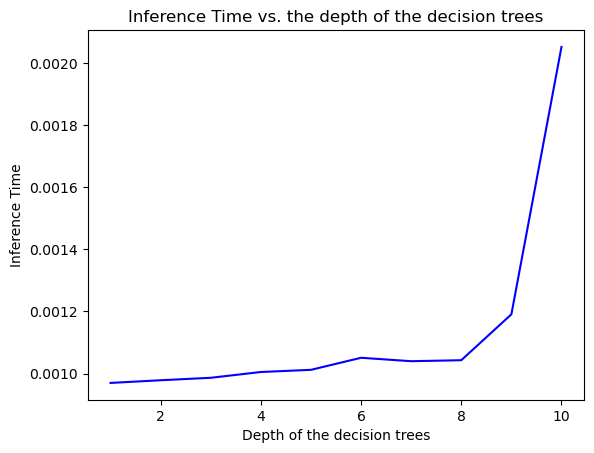

In [22]:
plt.plot(depths_trees, forest_depth_time_test, color="blue")
plt.ylabel("Inference Time")
plt.xlabel("Depth of the decision trees")
plt.title("Inference Time vs. the depth of the decision trees")
plt.show()

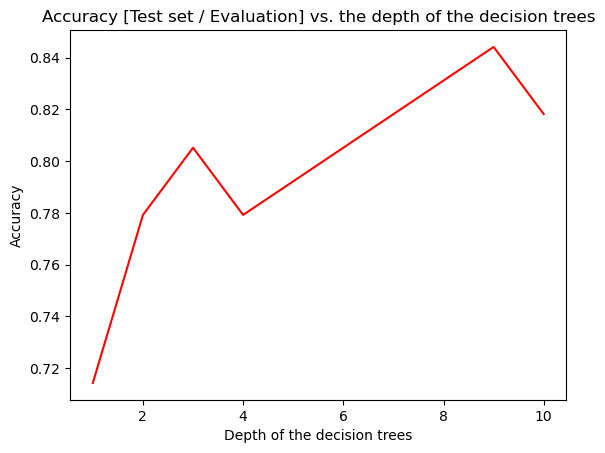

In [23]:
plt.plot(depths_trees, forest_depth_perf, color="red")
plt.ylabel("Accuracy")
plt.xlabel("Depth of the decision trees")
plt.title("Accuracy [Test set / Evaluation] vs. the depth of the decision trees")
plt.show()

- Training time vs. depth of trees: training time is fluctuate when number of trees is increasing. When run the algorithm again the training time is different (the plot change)
- Convergence vs. depth of trees [on training data]: convergence is increasing to limit 1 when depth of trees is increasing. When run the algorithm again the convergence is remain
- Prediction time vs. depth of trees: Prediction is fluctuate when depth of trees is increasing. When run the algorithm again the prediction time is different (the plot change)
- Performance vs. depth of trees [on unssen data, the test set]:performance is increasing but fluctuate sometimes when depth of trees is increasing. When run the algorithm again the performance is remain

## 4 - Conclusion

- By intuition, what are the optimal hyperparameter for the good models to solve our car classification problem ?

the optimal hyperparameter is convergence (accuracy on training data) and performance (accuracy on test data)

- the differences between decision trees and random forests:


The random forest take more time to test than the decision tree

The accuracy of decision trees is not stable but the random forests's performance is stable when time change or increasing the number of tree/ depth or tree


## References 
1. Raschka, Sebastian, and Vahid Mirjalili. Python Machine Learning, 2nd Ed. Packt Publishing, 2017.
2. Scikit-learn Documentation, (https://scikit-learn.org/stable/modules/ensemble.html